# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.


We're going to take the following approach:

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Probelm Defination

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the UCI Machine Learning Repository.
https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle.
https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation / Goal
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data.

**Create Data Dictionary**


1. age - age in years

2. sex - (1 = male; 0 = female)

3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease 
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
     * serum = LDL + HDL + .2 * triglycerides
     * above 200 is cause for concern 
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes    
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
         * can range from mild symptoms to severe problems
         * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
         * Enlarged heart's main pumping chamber        
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart   
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)  
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when   excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)


## Preparing Tools
We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [3]:

# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook

%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load Data

In [4]:
df = pd.read_csv('heart-disease.csv')
# (rows,columns)
df.shape

(303, 14)

## EDA (Exploratory Data Analysis)

The Strategy here to find insights about the data by keeping all following key steps.

1. What question are we trying to solve ?
2. What sort of data we have and how do we treat differnt types(i.e Numerical, String, categorical) ?
3. What is missing from the data and how do we deal with it ?
4. What are the outliers and why should we care about them ?
5. How can you add, change or remove features to get more out of your data?


In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
# To check is it a balance classification probelm ?
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

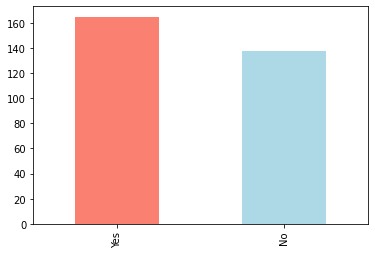

In [27]:
# Let visualize target data to find distribution of data
df.target.apply(lambda x:'No' if (x == 0) else 'Yes').value_counts().plot(kind = 'bar', color = ['salmon','lightblue']);

From our Visualization we can see that the data is balanced

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [31]:
# Is there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [32]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart disease Frequency According to sex

In [68]:
df['sex'].value_counts()


1    207
0     96
Name: sex, dtype: int64

In [36]:
# Compare target column to sex column
pd.crosstab(df.target.apply(lambda x:'No' if (x == 0) else 'Yes'), df.sex.apply(lambda x:'Female' if (x == 0) else 'Male'))

sex,Female,Male
target,,
No,24,114
Yes,72,93


In [83]:
# Female get heart disease of 75% according to given cross tab calculations
print("Female : yes",(72)/(72+24))

# Male get heart disease of 0.45% according to given cross tab calculations
print("Male : yes", 93/(93+114))

Female : yes 0.75
Male : yes 0.4492753623188406


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

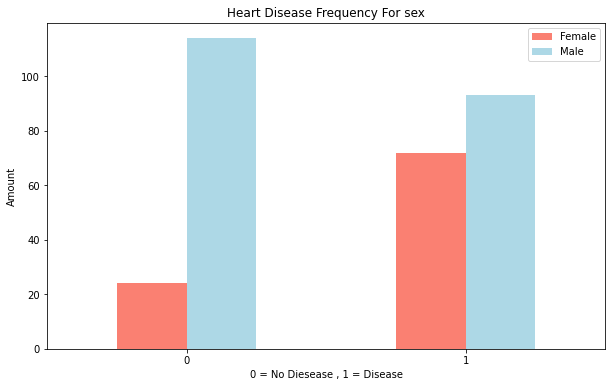

In [86]:
# Plot our crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency For sex")
plt.xlabel("0 = No Diesease , 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0)

## Age vs Max Heart Rate for Heart disease

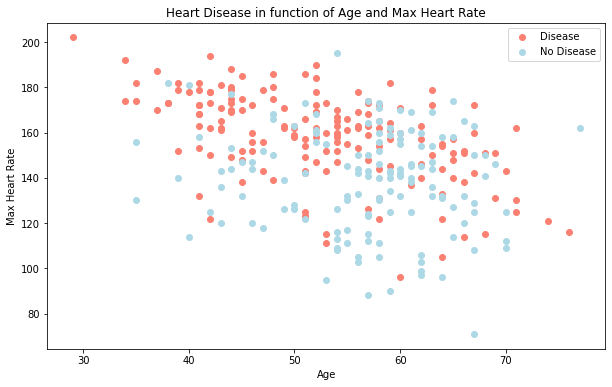

In [130]:
# Create another figure
plt.figure(figsize = (10,6))

# scatter plot with positive results
plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
            color = 'salmon')
# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

In [129]:
# Testing 
df.age[df.age>=50][df.target == 1].value_counts(sort = False)


50     4
51     9
52     9
53     6
54    10
55     3
56     5
57     7
58     7
59     5
60     3
61     1
62     4
63     3
64     6
65     4
66     4
67     3
68     2
69     2
70     1
71     3
74     1
76     1
Name: age, dtype: int64

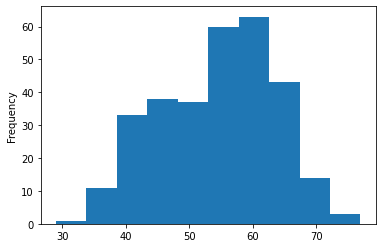

In [131]:
# Check the distribution of the age column with a histogram
# It shows normal distribution(data centered at mean and spread equally both side)
df.age.plot.hist();

## Heart Disease Freq per chest pain type

1. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease 

In [133]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


**2: Non-anginal pain: typically esophageal spasms (non heart related)**

seems to have strong relationship with heart disease patients as per cross table 

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

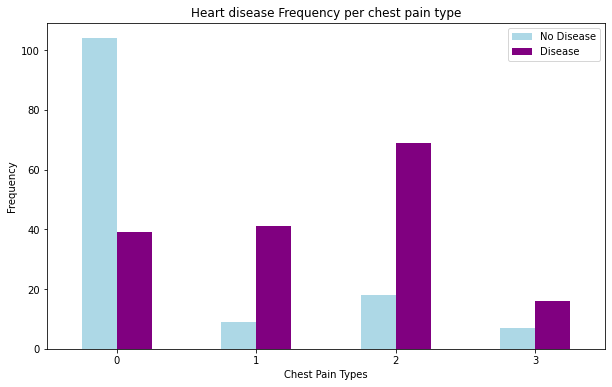

In [144]:
# CROSS TAB VISUALS
pd.crosstab(df.cp,df.target).plot(kind = 'bar',
                                 figsize = (10, 6),
                                 color =['lightblue','purple'])
# MAKING OUR PLOT MORE REPRESENTATIVE
plt.title("Heart disease Frequency per chest pain type")
plt.xlabel("Chest Pain Types")
plt.ylabel("Frequency")
plt.legend(['No Disease','Disease'])
plt.xticks(rotation = 0)

In [145]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [146]:
# Make a correlation plots to check multicorrelation of our Independent variables
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

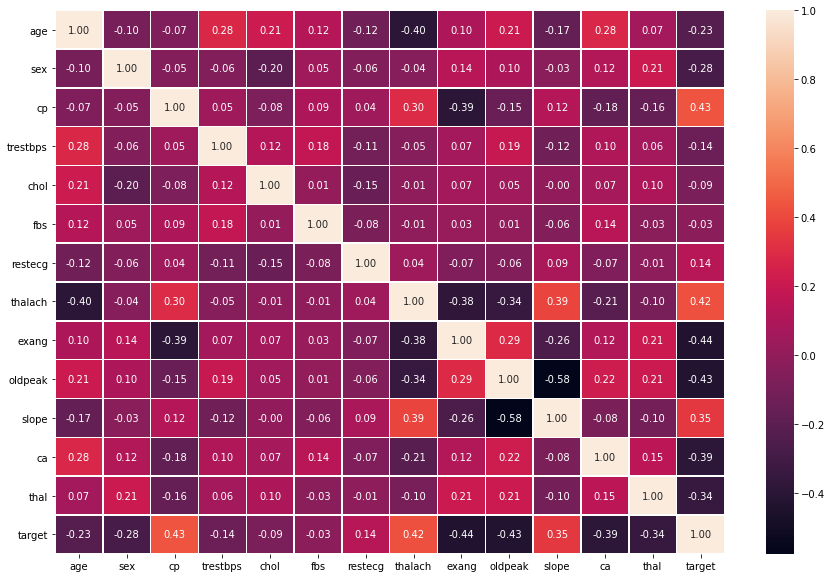

In [158]:
# Let make our correlation matrix plot for visualization
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt=".2f",
            )


In [183]:
# From our correlation plot there is not much strong correaltion among independent variables
# Except slope and old peak which have strong negative correlation with each other

## Modelling

In [159]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [160]:
# Split Data into X and Y
X = df.drop("target",axis =1)
y = df['target']

In [161]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [163]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [215]:
# Split data into train and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [168]:
# Checking length of train and test splits

print('X_train:', len(X_train))
print('X_test:', len(X_test))
print('Y_train:', len(y_train))
print('y_test:', len(y_test))

X_train: 242
X_test: 61
Y_train: 242
y_test: 61


In [169]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

Time to build a Classification Machine Learning model

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We are going to try 3 differnt machine learning models:
1. Logistic Regressio
2. K - Nearest Neighbour
3. Random Forest Classifier


In [181]:
# Put models in our dictionary
models = {'Logistic Regression': LogisticRegression(),
          'Knn':KNeighborsClassifier(),
          'Random Forest':RandomForestClassifier()}

# Create function to fit and score the model
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and Evaluates given machine learning models.
    models: A dict of different Scikit-Learn Models
    
    X_train: Training data(no labels)
    X_test : Testing data(no labels)
    y_train : training labels
    y_test : test labels
    """
    
    # Set Random Seed
    np.random.seed(45)
    # Make a dictionary to keep model scores
    model_scores = {}
    
    # Here name = Key and model = Value from our models dict
    for name,model in models.items():
        # Fit model to the data
        model.fit(X_train,y_train)
        # Evaluate the model and append results in model_score
        model_scores[name]= model.score(X_test,y_test)
    
    return model_scores
        

In [231]:
# printing Accuracy of models
models_score = fit_and_score(models = models,
                            X_train = X_train,
                            X_test = X_test,
                            y_train = y_train,
                            y_test = y_test)
models_score

c:\users\imran\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Logistic Regression': 0.8852459016393442,
 'Knn': 0.6885245901639344,
 'Random Forest': 0.8524590163934426}

## Model Comparasion

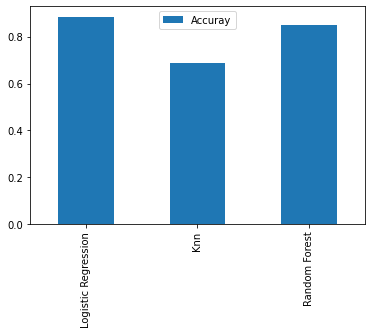

In [232]:
# Comparing the models visually
model_compare = pd.DataFrame(models_score,index=['Accuray'])
# T = Tranpose
model_compare.T.plot.bar();

Now we have got baseline models results.

Next steps to follow to tune and evaluate metrices

* Hyperparameter Tunning
* Feature Importance
* Confusion Matrix
* Cross Validation
* Precision
* Recall
* F1 score
* Classification Report
* ROC Curve
* Area under the curve (AUC)


## Hyperparameter Tunning

In [238]:
## Lets tune Knn

train_scores = []
test_scores = []

# Create a list of differnt values for n_neaighbours
neighbours = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different neighbours

for i in neighbours:
    knn.set_params(n_neighbors = i)
    
    # Fit the algorithm
    knn.fit(X_train,y_train)
    
    # Update training scores list
    train_scores.append(knn.score(X_train,y_train))
    
    # Update testing scores list
    test_scores.append(knn.score(X_test,y_test))

In [239]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [240]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

The best Knn score on test data is  :75.41%


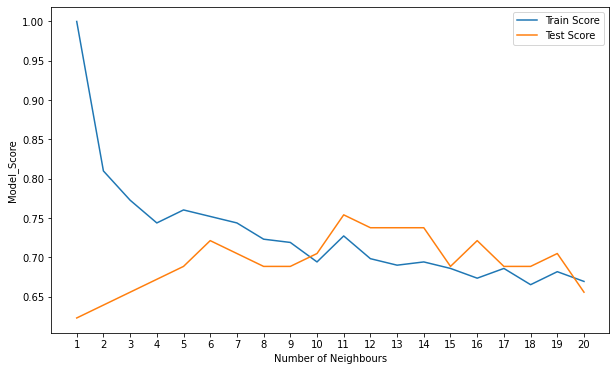

In [242]:
plt.figure(figsize = (10,6))
plt.plot(neighbours, train_scores, label = 'Train score')
plt.plot(neighbours,test_scores, label = 'Test score')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of Neighbours")
plt.ylabel("Model_Score")
plt.legend(['Train Score','Test Score'])
print(f"The best Knn score on test data is  :{max(test_scores)*100:.2f}%")

## Hyperparameter Tunning with RandomizedSerachCv

We are going to tune:
* Logistic Regression()
* RandomForestClassifier

... using RandomizedSearchCV

In [233]:
# Create a hyperparameter grid for logistic regression
log_reg_grid = {'C' : np.logspace(-4,4,20),
               'solver':['liblinear']}
# Create a hyperparameter grid for RandomForestclassifier

rf_grid = {'n_estimators':np.arange(10, 1000, 50),
           'max_depth': [None, 3, 5 , 10],
           'min_samples_split':np.arange(2,20,2),
           'min_samples_leaf':np.arange(1,20,2)}

Now we have got hyperparameter grids setup for each of our models,
let's tune them using RandomizedSearchCV

In [234]:
# Tune Logistic Regression

np.random.seed(42)

# Setup random hyperparameter search for logistic regression

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv = 5,
                               n_iter = 20,
                               verbose = True)
# Fit Logistic Randomized search cv model
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [235]:
# Look for best params serached by Logistic Randomized search cv
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [236]:
# Identify the score
rs_log_reg.score(X_test,y_test)

0.8852459016393442

Set param grids for Random Forest

In [228]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [229]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [230]:
# Identify the score
rs_rf.score(X_test,y_test)

0.8688524590163934

## Hyperparamter Tuning with GridSearchCV

Trying to improve our logistic regration model scores using GridSearchCv as it performed best among rest of 2 algorithm

In [243]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [244]:
# Check the best hyperparmaters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [245]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [247]:
models_score

{'Logistic Regression': 0.8852459016393442,
 'Knn': 0.6885245901639344,
 'Random Forest': 0.8524590163934426}

Surprisingly we got same results of logistic resgression even after 
implementing GridSearchCV.

## Evaluting our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion Matrix
* Classsification report
* precision 
* Recall
* F1-score

We need to make predictions first for evaluation and comparasion of trained model

In [251]:
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

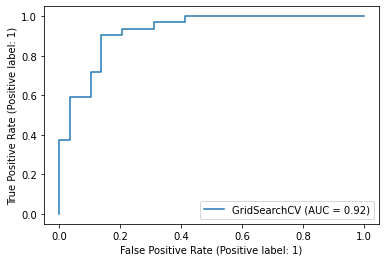

In [252]:
# Plot ROC curve and calculate and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test)

In [254]:
# Confusion matrix
conf_mat = confusion_matrix(y_test,y_preds)
print(conf_mat)

[[25  4]
 [ 3 29]]


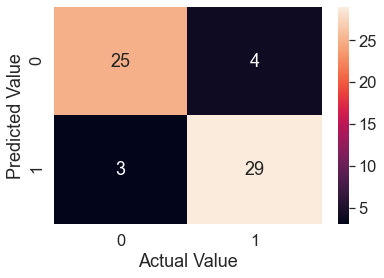

In [262]:
# Plot The confusion matrix
sns.set(font_scale = 1.5)
ax = sns.heatmap(conf_mat,annot = True)
ax.set(xlabel='Actual Value', ylabel='Predicted Value')
plt.show()


Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score.

In [263]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [281]:
# Print overal1 predicted values
a = (y_preds == 0).sum()
b = (y_preds == 1).sum()
print("Overall Prediction\n" + 
    "predicted 0:",str(a) + ",  predicted 1:",str(b))

Overall Prediction
predicted 0: 28,  predicted 1: 33


## Calculate evaluation metrics using cross-validation
We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using cross_val_score()

In [282]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [283]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [284]:
# Cross-validated accuracy
# X and y are our 
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [285]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [286]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8215873015873015

In [288]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [290]:

# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

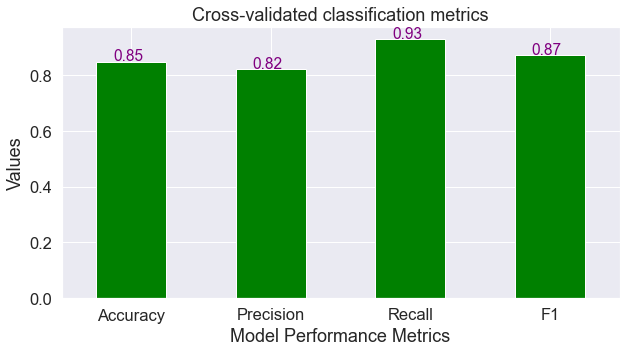

In [528]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                            index=[0])

                          
ax = cv_metrics.T.plot.bar(figsize=(10,5),color = 'Green',
                           title="Cross-validated classification metrics",
                           legend=False,
                           xlabel ='Model Performance Metrics',
                           ylabel ='Values'
                          );
plt.xticks(rotation = 0)
  
a = []
for i,v in enumerate (cv_metrics.columns):
    a.append(round(cv_metrics[v][0],2))

for i, v in enumerate(a):
    ax.text((i-0.13), 
              v+0.003, 
              a[i], 
              fontsize = 15.5, 
              color= 'purple')
 
    

In [395]:
a = []
for i,v in enumerate (cv_metrics.columns):
    a.append(cv_metrics[v][0])

a

[0.8479781420765027,
 0.8215873015873015,
 0.9272727272727274,
 0.8705403543192143]

In [391]:
cv_metrics['Accuracy'][0]

0.8479781420765027

In [386]:
cv_metrics.columns

Index(['Accuracy', 'Precision', 'Recall', 'F1'], dtype='object')

## Feature Importance

"which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

In [292]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [293]:
# Check coef_
clf.coef_

array([[ 0.00320769, -0.86062047,  0.66001431, -0.01155971, -0.00166496,
         0.04017239,  0.31603402,  0.02458922, -0.6047017 , -0.56795457,
         0.45085391, -0.63733326, -0.6755509 ]])

In [294]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [295]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0032076873709286024,
 'sex': -0.8606204735539111,
 'cp': 0.6600143086174385,
 'trestbps': -0.01155970641957489,
 'chol': -0.0016649609500147373,
 'fbs': 0.04017238940156104,
 'restecg': 0.3160340177157746,
 'thalach': 0.02458922261936637,
 'exang': -0.6047017032281077,
 'oldpeak': -0.567954572983317,
 'slope': 0.4508539117301764,
 'ca': -0.6373332602422034,
 'thal': -0.6755508982355707}

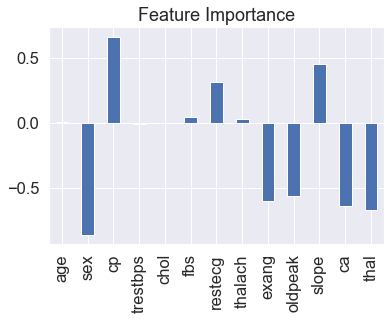

In [296]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [297]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


slope - the slope of the peak exercise ST segment

* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy hear

In [298]:
# Slope vs Target to check feature importance effect i.e.correlation
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
